<a href="https://colab.research.google.com/github/manogna5/handwritten_digits_classification/blob/master/classifyingfashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn

In [0]:
from torch import nn,optim
import torch.nn.functional as F

In [0]:
from torchvision import datasets,transforms

In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,64)
    self.fc4=nn.Linear(64,10)
  def forward(self,x):
    x=x.view(x.shape[0],-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.log_softmax(self.fc4(x),dim=1)
    return x
    


In [0]:
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)


In [0]:
epochs=5
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    logps=model(images)
    loss=criterion(logps,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss=running_loss+loss.item()
  else:
    print(f"training loss:'{running_loss}")

training loss:'318.5480744149536
training loss:'164.38615761324763
training loss:'133.03108979109675
training loss:'115.3276241789572
training loss:'101.17735068220645


In [0]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-02-27 14:45:37--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-02-27 14:45:37 (60.5 MB/s) - ‘helper.py.1’ saved [2813/2813]



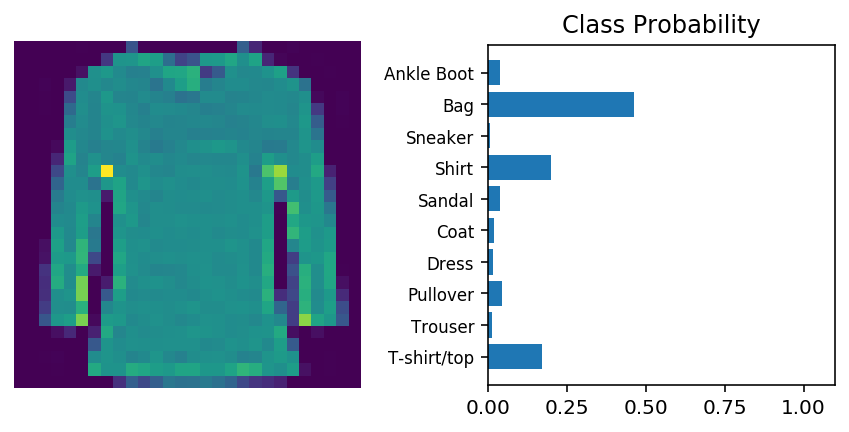

In [0]:
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')